In [17]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [18]:
# adult naive log preprocessing

trng_acc_logs = []
trng_fair_logs = []
valid_acc_logs = []
valid_fair_logs = []
test_acc_logs = []
test_fair_logs = []

for seed in range(2):
    with open("./log/adult_seed_{}_naive_log.txt".format(seed), "rb") as fp:
        log = pickle.load(fp)
        trng_acc_logs.append(log[0])
        trng_fair_logs.append(log[1])
        valid_acc_logs.append(log[2])
        valid_fair_logs.append(log[3])
        test_acc_logs.append(log[4])
        test_fair_logs.append(log[5])
        
trng_acc_logs = np.array(trng_acc_logs)
trng_fair_logs = np.array(trng_fair_logs)
valid_acc_logs = np.array(valid_acc_logs)
valid_fair_logs = np.array(valid_fair_logs)
test_acc_logs = np.array(test_acc_logs)
test_fair_logs = np.array(test_fair_logs)    

In [19]:
# adult naive acc plotitng

# find max epoch
max_test_acc_idx = np.argmax(test_acc_logs, axis=1)

trng_avg_acc_logs = []
valid_avg_acc_logs = []
test_avg_acc_logs = []

for row, col in enumerate(max_test_acc_idx):
    trng_avg_acc_logs.append(trng_acc_logs[row, col])
    valid_avg_acc_logs.append(valid_acc_logs[row, col])
    test_avg_acc_logs.append(test_acc_logs[row, col])

trng_avg_acc_logs = np.array(trng_avg_acc_logs)
valid_avg_acc_logs = np.array(valid_avg_acc_logs)
test_avg_acc_logs = np.array(test_avg_acc_logs)

naive_trng_acc = np.mean(trng_avg_acc_logs)
naive_valid_acc = np.mean(valid_avg_acc_logs)
naive_test_acc = np.mean(test_avg_acc_logs)



print("naive_trng_acc:{}, naive_valid_acc:{}, naive_test_acc:{}".format(naive_trng_acc,
                                                                        naive_valid_acc, 
                                                                        naive_test_acc))

# trng_avg_acc_logs = np.mean(trng_acc_logs, axis=0)
# valid_avg_acc_logs = np.mean(valid_acc_logs, axis=0)
# test_avg_acc_logs = np.mean(test_acc_logs, axis=0)

# plt.plot(trng_avg_acc_logs, label="trng_acc")
# plt.plot(valid_avg_acc_logs, label="valid_acc")
# plt.plot(test_avg_acc_logs, label="test_acc")

# plt.legend()

# plt.show()

naive_trng_acc:0.8558223768266937, naive_valid_acc:0.8582089552238805, naive_test_acc:0.8485351022664456


In [20]:
# adult naive fair plotitng

# find max test epoch

trng_avg_fair_logs = []
valid_avg_fair_logs = []
test_avg_fair_logs = []

for row, col in enumerate(max_test_acc_idx):
    trng_avg_fair_logs.append(trng_fair_logs[row, col])
    valid_avg_fair_logs.append(valid_fair_logs[row, col])
    test_avg_fair_logs.append(test_fair_logs[row, col])

trng_avg_fair_logs = np.array(trng_avg_fair_logs)
valid_avg_fair_logs = np.array(valid_avg_fair_logs)
test_avg_fair_logs = np.array(test_avg_fair_logs)

naive_trng_fair = np.mean(trng_avg_fair_logs)
naive_valid_fair = np.mean(valid_avg_fair_logs)
naive_test_fair = np.mean(test_avg_fair_logs)

print("naive_trng_fair:{}, naive_valid_fair:{}, naive_test_fair:{}".format(np.mean(naive_trng_fair),
                                                                        np.mean(naive_valid_fair), 
                                                                        np.mean(naive_test_fair)))




# trng_avg_fair_logs = np.mean(trng_fair_logs, axis=0)
# valid_avg_fair_logs = np.mean(valid_fair_logs, axis=0)
# test_avg_fair_logs = np.mean(test_fair_logs, axis=0)

# plt.plot(trng_avg_fair_logs, label="trng_fair")
# plt.plot(valid_avg_fair_logs, label="valid_fair")
# plt.plot(test_avg_fair_logs, label="test_fair")

# plt.legend()

# plt.show()

naive_trng_fair:0.0953648095163715, naive_valid_fair:0.08314404486541072, naive_test_fair:0.03764285399802508


In [23]:
# adult leave-k-out preprocessing

trng_avg_acc_logs_by_k = []
trng_avg_fair_logs_by_k = []
valid_avg_acc_logs_by_k = []
valid_avg_fair_logs_by_k = []
test_avg_acc_logs_by_k = []
test_avg_fair_logs_by_k = []

for k in range(1, 21, 1):

    trng_acc_logs = []
    trng_fair_logs = []
    valid_acc_logs = []
    valid_fair_logs = []
    test_acc_logs = []
    test_fair_logs = []

    for seed in range(1):
        with open("./log/adult_seed_{}_k_{}.0_acc_fair_log.txt".format(seed, k), "rb") as fp:
            log = pickle.load(fp)
            
            trng_acc_logs.append(log[0])
            trng_fair_logs.append(log[1])
            valid_acc_logs.append(log[2])
            valid_fair_logs.append(log[3])
            test_acc_logs.append(log[4])
            test_fair_logs.append(log[5]) 
                
    trng_acc_logs = np.array(trng_acc_logs)
    trng_fair_logs = np.array(trng_fair_logs)
    valid_acc_logs = np.array(valid_acc_logs)
    valid_fair_logs = np.array(valid_fair_logs)
    test_acc_logs = np.array(test_acc_logs)
    test_fair_logs = np.array(test_fair_logs)
    
    trng_avg_acc_logs_by_k.append(np.mean(trng_acc_logs, axis=0))
    trng_avg_fair_logs_by_k.append(np.mean(trng_fair_logs, axis=0))
    valid_avg_acc_logs_by_k.append(np.mean(valid_acc_logs, axis=0))
    valid_avg_fair_logs_by_k.append(np.mean(valid_fair_logs, axis=0))
    test_avg_acc_logs_by_k.append(np.mean(test_acc_logs, axis=0))
    test_avg_fair_logs_by_k.append(np.mean(test_fair_logs, axis=0))

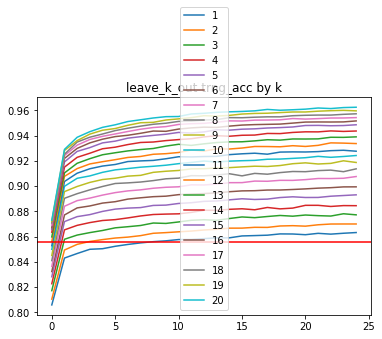

In [24]:
for k in range(20):
    plt.plot(trng_avg_acc_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_k_out trng_acc by k")
plt.legend()
plt.show()

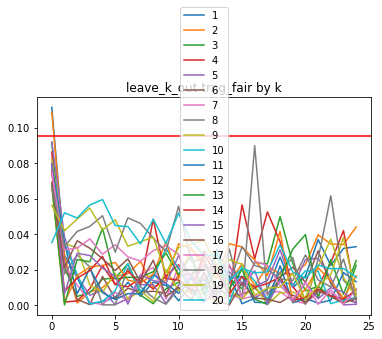

In [25]:
for k in range(20):
    plt.plot(trng_avg_fair_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_k_out trng_fair by k")
plt.legend()
plt.show()

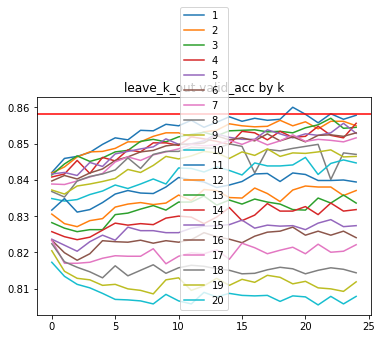

In [26]:
for k in range(20):
    plt.plot(valid_avg_acc_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_valid_acc, color='r', linestyle='-')
plt.title("leave_k_out valid_acc by k")
plt.legend()
plt.show()

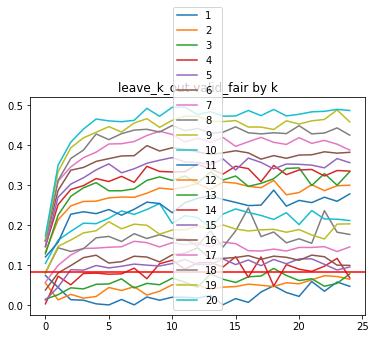

In [27]:
for k in range(20):
    plt.plot(valid_avg_fair_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_valid_fair, color='r', linestyle='-')
plt.title("leave_k_out valid_fair by k")
plt.legend()
plt.show()

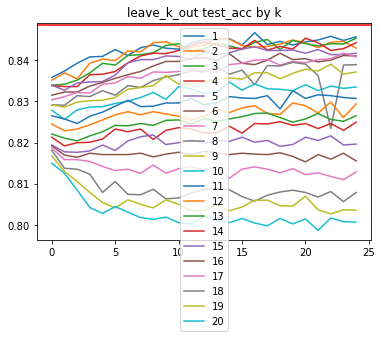

In [28]:
for k in range(20):
    plt.plot(test_avg_acc_logs_by_k[k], label="{}".format(k + 1))


plt.axhline(y = naive_test_acc, color='r', linestyle='-')    
plt.title("leave_k_out test_acc by k")
plt.legend()
plt.show()

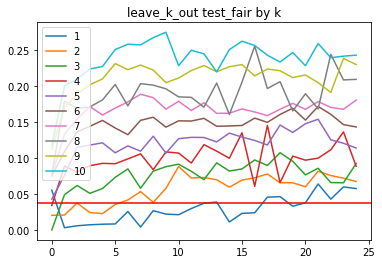

In [29]:
for k in range(10):
    plt.plot(test_avg_fair_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_test_fair, color='r', linestyle='-')
plt.title("leave_k_out test_fair by k")
plt.legend()
plt.show()

In [12]:
# adult leave-bottom-k-out preprocessing

trng_avg_acc_logs_by_k = []
trng_avg_fair_logs_by_k = []
valid_avg_acc_logs_by_k = []
valid_avg_fair_logs_by_k = []
test_avg_acc_logs_by_k = []
test_avg_fair_logs_by_k = []

for k in range(1, 21, 1):

    trng_acc_logs = []
    trng_fair_logs = []
    valid_acc_logs = []
    valid_fair_logs = []
    test_acc_logs = []
    test_fair_logs = []

    for seed in range(10):
        with open("./log/adult_seed_{}_bottom_k_{}_acc_fair_log.txt".format(seed, k), "rb") as fp:
            log = pickle.load(fp)
            
            trng_acc_logs.append(log[0])
            trng_fair_logs.append(log[1])
            valid_acc_logs.append(log[2])
            valid_fair_logs.append(log[3])
            test_acc_logs.append(log[4])
            test_fair_logs.append(log[5]) 
                
    trng_acc_logs = np.array(trng_acc_logs)
    trng_fair_logs = np.array(trng_fair_logs)
    valid_acc_logs = np.array(valid_acc_logs)
    valid_fair_logs = np.array(valid_fair_logs)
    test_acc_logs = np.array(test_acc_logs)
    test_fair_logs = np.array(test_fair_logs)
    
    trng_avg_acc_logs_by_k.append(np.mean(trng_acc_logs, axis=0))
    trng_avg_fair_logs_by_k.append(np.mean(trng_fair_logs, axis=0))
    valid_avg_acc_logs_by_k.append(np.mean(valid_acc_logs, axis=0))
    valid_avg_fair_logs_by_k.append(np.mean(valid_fair_logs, axis=0))
    test_avg_acc_logs_by_k.append(np.mean(test_acc_logs, axis=0))
    test_avg_fair_logs_by_k.append(np.mean(test_fair_logs, axis=0))

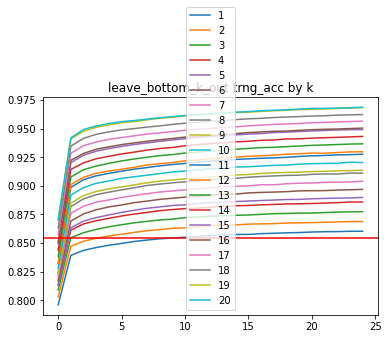

In [13]:
for k in range(20):
    plt.plot(trng_avg_acc_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_trng_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out trng_acc by k")
plt.legend()
plt.show()

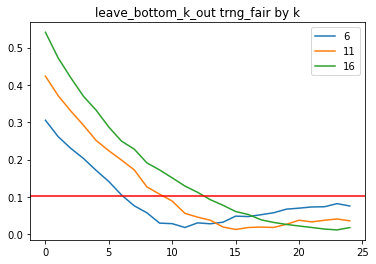

In [14]:
for k in range(5, 20, 5):
    plt.plot(trng_avg_fair_logs_by_k[k], label="{}".format(k + 1))

plt.axhline(y = naive_trng_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out trng_fair by k")
plt.legend()
plt.show()

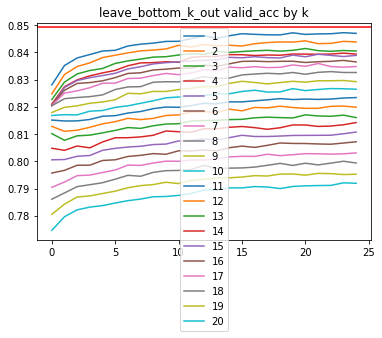

In [15]:
for k in range(20):
    plt.plot(valid_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out valid_acc by k")
plt.legend()
plt.show()

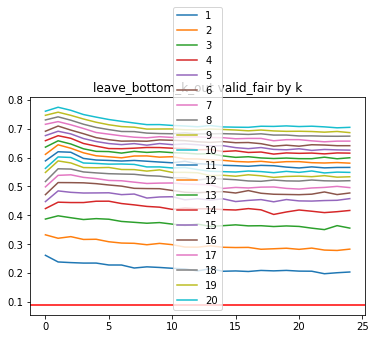

In [16]:
for k in range(20):
    plt.plot(valid_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_valid_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out valid_fair by k")
plt.legend()
plt.show()

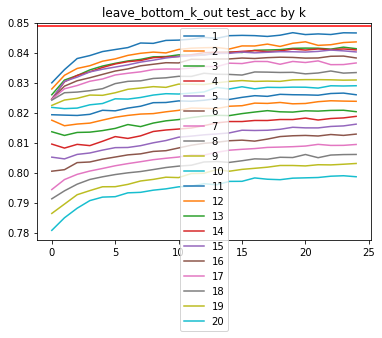

In [17]:
for k in range(20):
    plt.plot(test_avg_acc_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_test_acc, color='r', linestyle='-')
plt.title("leave_bottom_k_out test_acc by k")
plt.legend()
plt.show()

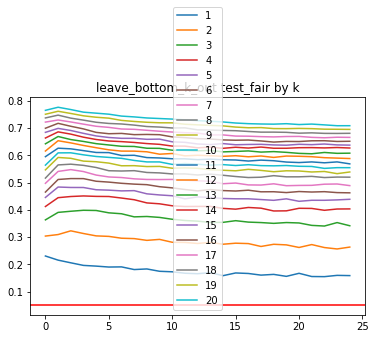

In [18]:
for k in range(20):
    plt.plot(test_avg_fair_logs_by_k[k], label="{}".format(k + 1))
plt.axhline(y = naive_test_fair, color='r', linestyle='-')
plt.title("leave_bottom_k_out test_fair by k")
plt.legend()
plt.show()